In [76]:
# Numpy is numerical python. 
# Pandas is data processing, CSV file I/O (e.g. pd.read_csv)
# Matplotlib and Seaborn is data visualization
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pd'

In [ ]:
filePath = os.path.realpath('__file__')
print(filePath)

In [ ]:
Path = os.path.dirname(filePath)
Pat = os.path.dirname(Path)
print(Pat)

In [ ]:
pokemon = pd.read_csv(Pat + '/Inputs/pokemon.csv')
pokemon

In [ ]:
# How to make dataframe
d = {'col1' : [1,2], 'col2' : [3,4]}
df = pd.DataFrame(d)
df

In [32]:
# rename the column with a pound isng/hashtag as "number" its name
# The reason for this is when we try and access this column later it will comment out the code
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
pokemon

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [33]:
combat = pd.read_csv(Pat + '/Inputs/combats.csv')

In [34]:
combat

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [35]:
print("Dimensions of pokemon:" + str(pokemon.shape))
print("Dimensions of Combat: " + str(combat.shape))

Dimensions of pokemon:(800, 12)
Dimensions of Combat: (50000, 3)


In [36]:
# isna() = isnull(): Whether the data value is null
pokemon.isna()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,False,False,False,False,False,False,False,False,False,False,False,False
796,False,False,False,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,False,False
798,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
pokemon.isnull().sum()  

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [38]:
#Find the missing pokemon
pokemon[pokemon['Name'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [39]:
print("This pokemon is before the missing pokemon: "+ pokemon['Name'][61])
print("This pokemon is after the missing pokemon: "+ pokemon['Name'][63])

This pokemon is before the missing pokemon: Mankey
This pokemon is after the missing pokemon: Growlithe


In [40]:
# Update the missing pokemon
pokemon['Name'][62] = "Primeape"

/Users/Zoombie83831/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
# Index is the matchup order and the number on the right represents the winner of the matchup
combat_winner = combat['Winner']
combat_winner #series

0        298
1        701
2        668
3        683
4        151
        ... 
49995    707
49996    589
49997    368
49998    109
49999      9
Name: Winner, Length: 50000, dtype: int64

In [42]:
#iloc: Selecting the rows with index. Combat matchup results
combat.iloc[1]

First_pokemon     702
Second_pokemon    701
Winner            701
Name: 1, dtype: int64

In [43]:
#Counting the total number of wins of each pokemons
total_Wins = combat_winner.value_counts()
total_Wins

163    152
154    136
438    136
428    134
432    133
      ... 
189      5
237      4
639      4
190      3
290      3
Name: Winner, Length: 783, dtype: int64

In [44]:
# Finding the pokemon number, 163
pokemon.iloc[[162]]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True


In [45]:
combat.groupby('Winner')

In [46]:
#Finding the number of wins of each pokemon
numberOfWins = combat.groupby('Winner').count()
numberOfWins

,First_pokemon,Second_pokemon
Winner,,
1,37,37
2,46,46
3,89,89
4,70,70
5,55,55
...,...,...
796,39,39
797,116,116
798,60,60


In [47]:
# Counting the number of battles for each pokemon as a "First" pokemon. 
countbyFirst = combat.groupby('First_pokemon').count()
# Counting the number of battles for each pokemon as a "Second" pokemon. 
countbySecond = combat.groupby('Second_pokemon').count()

In [48]:
countbyFirst

,Second_pokemon,Winner
First_pokemon,,
1,70,70
2,55,55
3,68,68
4,62,62
5,50,50
...,...,...
796,49,49
797,64,64
798,60,60


In [49]:
countbySecond

,First_pokemon,Winner
Second_pokemon,,
1,63,63
2,66,66
3,64,64
4,63,63
5,62,62
...,...,...
796,56,56
797,67,67
798,59,59


In [50]:
countbyFirst.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            791, 792, 793, 794, 795, 796, 797, 798, 799, 800],
           dtype='int64', name='First_pokemon', length=784)

In [51]:
# Make the union set of countByFist.index & countBySecond.index
union_index = countbyFirst.index.join(countbySecond.index, how = "outer")
union_index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            791, 792, 793, 794, 795, 796, 797, 798, 799, 800],
           dtype='int64', name='First_pokemon', length=784)

In [52]:
# finding the pokemon which is always losing
# This pokemon is not included in the pokemons which has at least one more battle
find_losing_pokemon = np.setdiff1d(union_index, numberOfWins.index)-1
find_losing_pokemon

array([230])

In [53]:
# Find the pokemon which always lost
always_losing_pokemon = pokemon.iloc[find_losing_pokemon]
always_losing_pokemon

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False


In [54]:
#Adding the total fights and win percentage to the pokemon data. 
numberOfWins['Total Fights'] = countbyFirst['Winner'] + countbySecond['Winner']
numberOfWins['Win Percentage'] = numberOfWins['First_pokemon']/numberOfWins['Total Fights']

In [55]:
numberOfWins

,First_pokemon,Second_pokemon,Total Fights,Win Percentage
Winner,,,,
1,37,37,133,0.278195
2,46,46,121,0.380165
3,89,89,132,0.674242
4,70,70,125,0.560000
5,55,55,112,0.491071
...,...,...,...,...
796,39,39,105,0.371429
797,116,116,131,0.885496
798,60,60,119,0.504202


In [56]:
numberOfWins.loc[[154]]

,First_pokemon,Second_pokemon,Total Fights,Win Percentage
Winner,,,,
154,136,136,141,0.964539


In [57]:
# Merging the numberOfWins with the original pokemon dataset with the right index. 
results = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how = 'left')
results

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,37.0,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,46.0,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,89.0,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,70.0,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,55.0,112.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,39.0,39.0,105.0,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,116.0,116.0,131.0,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,60.0,60.0,119.0,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,89.0,89.0,144.0,0.618056


In [58]:
# Can also merge with a common part = left : 'Number' , right :'Winner'
results2 = pd.merge(pokemon, numberOfWins, left_on='Number', right_on = 'Winner', how = 'left')
results2

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,37.0,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,46.0,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,89.0,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,70.0,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,55.0,112.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,39.0,39.0,105.0,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,116.0,116.0,131.0,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,60.0,60.0,119.0,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,89.0,89.0,144.0,0.618056


In [59]:
results2.iloc[[153]]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539


In [60]:
# Pokemons without battle except shuckle. 
# Shuckle had battle records, but with zero wins. 
No_win_percentage = results[results['Win Percentage'].isnull()]
No_win_percentage

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN,NaN


In [61]:
# Top 10 highest winning percentage pokemons (sorted by the winning percentages of each pokemon in a descending order)
results2[np.isfinite(results2['Win Percentage'])].sort_values(by =  ['Win Percentage'], ascending = False).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,127.0,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,116.0,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,121.0,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,115.0,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,124.0,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,122.0,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,118.0,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,119.0,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,114.0,114.0,120.0,0.950000


In [62]:
# Top 10 lowest winning percentage pokemons (sorted by the winning percentage in ascending order)
results2[np.isfinite(results2['Win Percentage'])].sort_values(by =  ['Win Percentage']).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,5.0,5.0,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,5.0,5.0,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,6.0,6.0,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,6.0,6.0,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,7.0,7.0,133.0,0.052632
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,8.0,8.0,133.0,0.060150


In [63]:
# The basic statistics of each variable such as mean, max, std, etc.
# Describes the range and the average of these values we are working with. 
results2.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,63.856960,63.856960,127.541507,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,32.925941,32.925941,11.397402,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,3.000000,3.000000,92.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,36.000000,36.000000,120.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,62.000000,62.000000,128.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,91.000000,91.000000,135.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,152.000000,152.000000,164.000000,0.984496


Text(0.5, 1.0, 'Total Pokemon by Type 1')

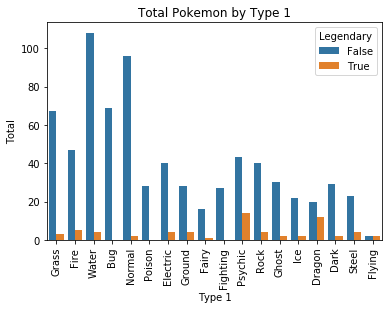

In [64]:
# Countplot: shows the counts of observations for each categor
# With given hue, separate the counts of each category for its hue.
# hue : type 1

sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue = "Legendary", data=results2)
plt.xticks(rotation=90)
plt.xlabel('Type 1')
plt.ylabel('Total')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 1')

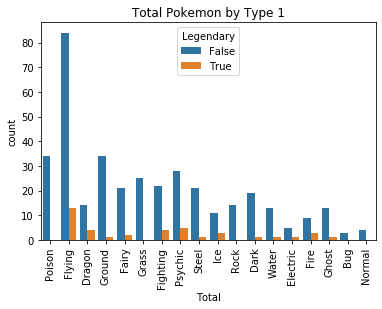

In [65]:
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 2", hue = "Legendary", data=results2)
plt.xticks(rotation=90)
plt.xlabel('Type 2')
plt.xlabel('Total')
plt.title("Total Pokemon by Type 1")

In [66]:
# Finding the average win percentage of the pokemons included in Type 1 with each Type. 
results2.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 1,
Fairy,0.329300
Rock,0.404852
Steel,0.424529
Poison,0.433262
Bug,0.439006
Ice,0.439604
Grass,0.440364
Water,0.469357
Fighting,0.475616


In [67]:
results2.groupby('Type 2').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 2,
Rock,0.306528
Ground,0.376463
Water,0.411971
Grass,0.420361
Fairy,0.432114
Bug,0.439055
Ghost,0.445396
Poison,0.452220
Steel,0.500881


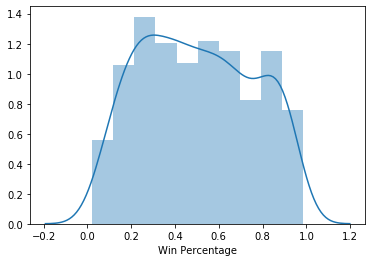

In [68]:
# distplot: Shows both histogram: rug and kernel density function
# Finding the histogram and kernel density estimate of the win percentages.
sns.distplot(results2["Win Percentage"].dropna(), kde = True, bins=10)

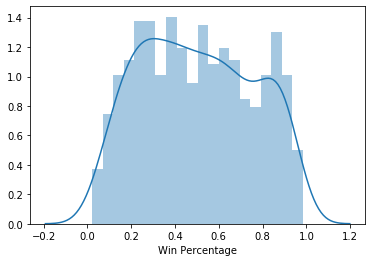

In [69]:
sns.distplot(results2["Win Percentage"].dropna(), kde = True, bins=20)

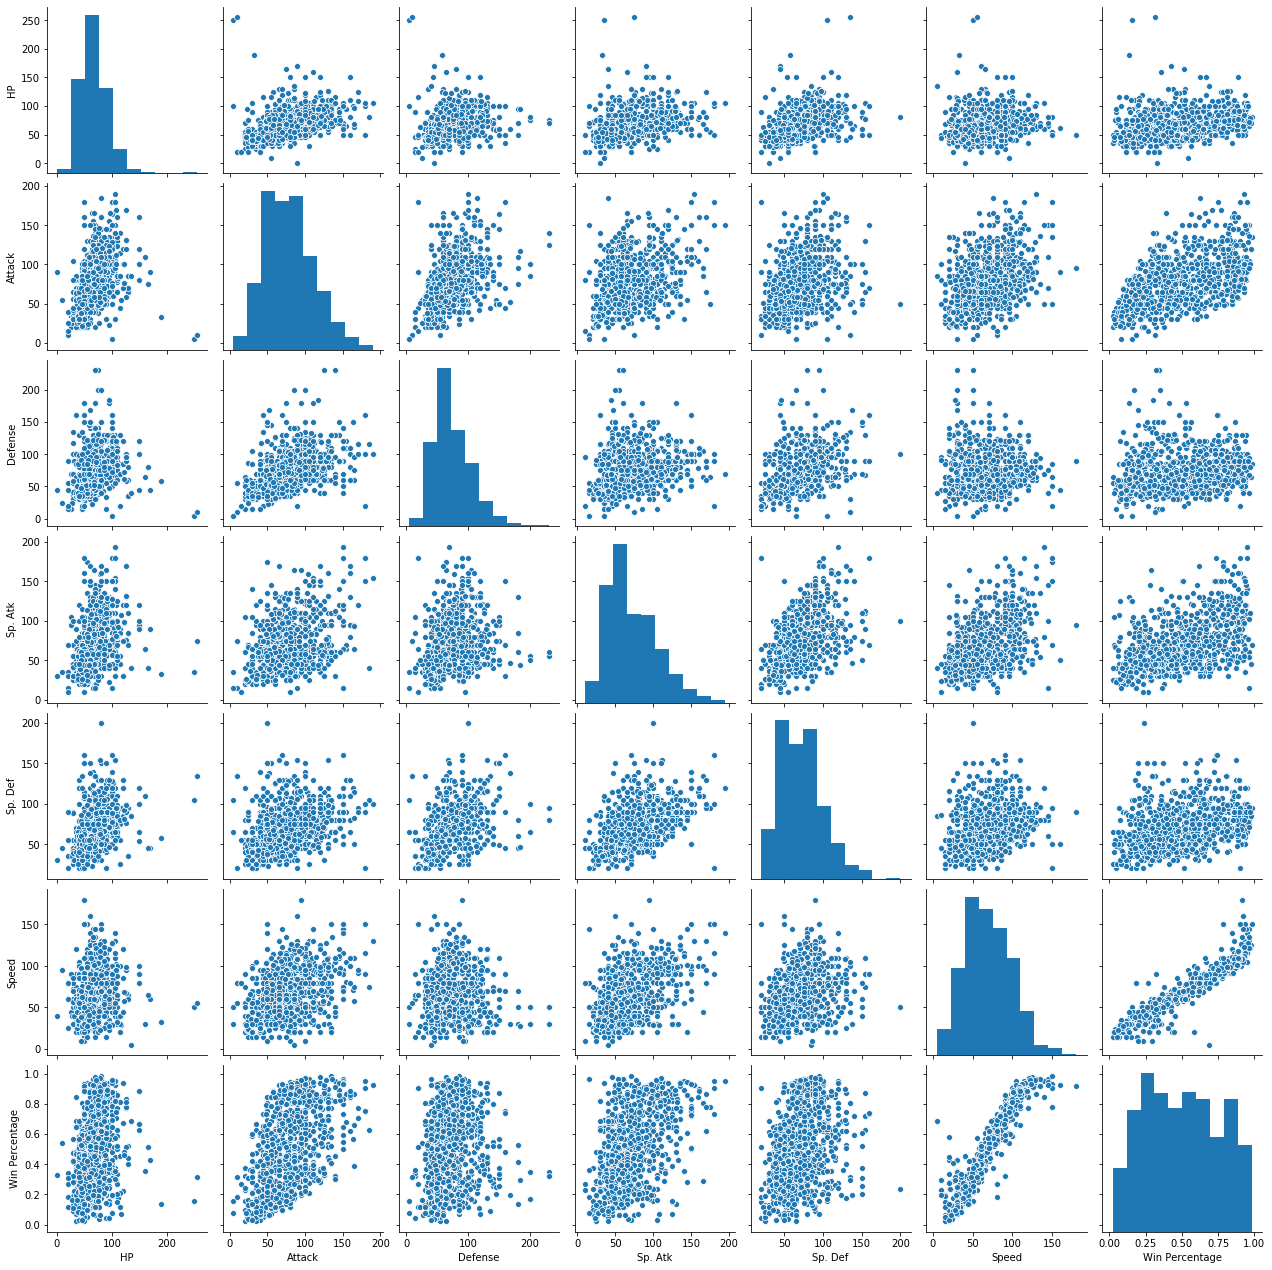

In [70]:
# pairplot : scatter plot for the different variables, histogram for same variable (diagonal)
# Find the pairplot for given columns (features).
# We can figure out the correlations of each column variable. 
col = ['Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
sns.pairplot(results2.loc[:,col].dropna())

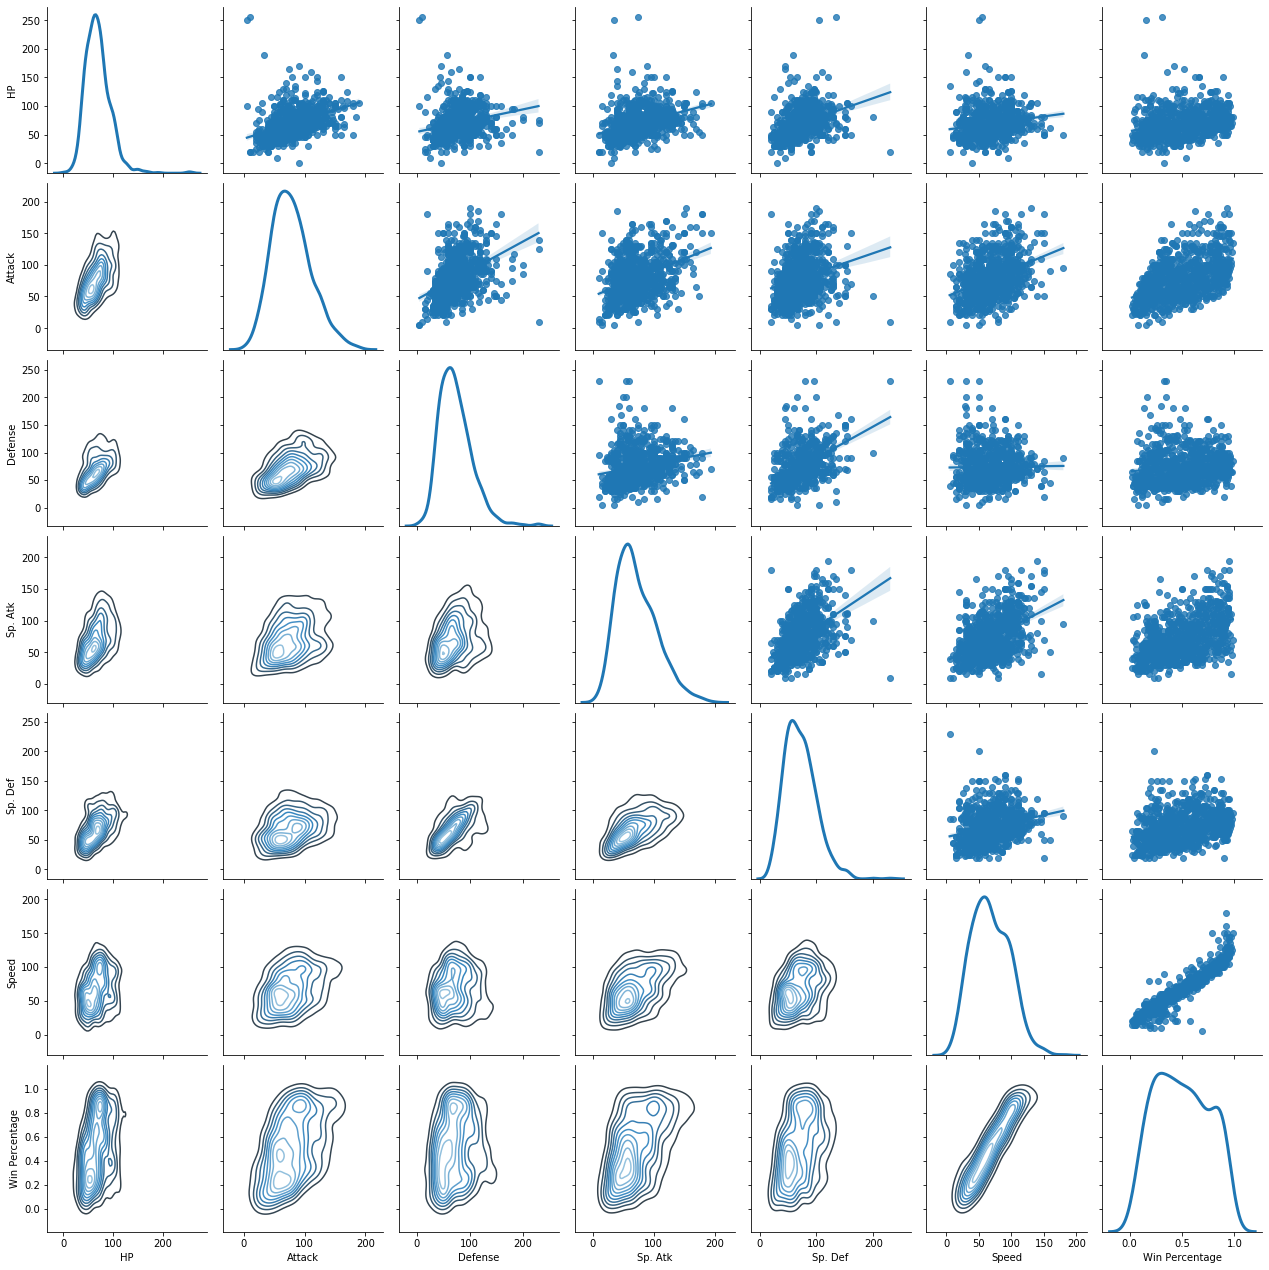

In [71]:
# Pairgrid is similar to pairplot, but can choose the graph of diagonal, lower triangle, upper triangle, of the matrix.
# Find the pairgrid for given col. 
g = sns.PairGrid(results2.loc[:, col],diag_sharey=False)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw =3)


In [72]:
# Precise correlation values for given col.
results2.loc[:,col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
Win Percentage,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


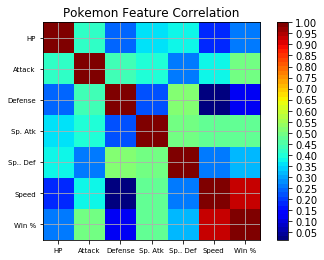

In [73]:
# Find the correlation matrix cmap.
# https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
# This function was taken from the link above

def correlation_matrix(df):
    import matplotlib.cm as cm
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation = "nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels = ['Type1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp.. Def', 'Speed', 'Win %']
    ax1.set_xticklabels(labels, fontsize = 7)
    ax1.set_yticklabels(labels, fontsize = 7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.00, 0.05, 0.10, 0.15, .20, .25, .30, .35, .40, .45, .50, .55, .60, .65, .70, .75, .80, .85, .90, .95, 1])
    plt.show()

correlation_matrix(results.loc[:, col])

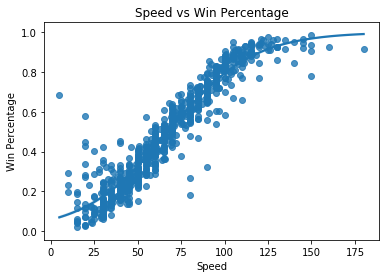

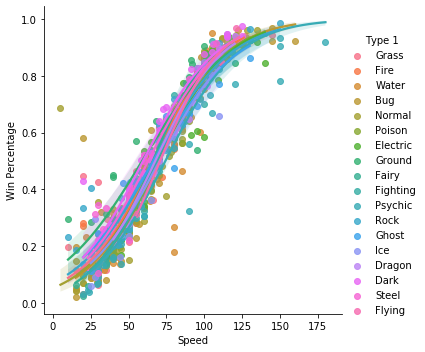

In [74]:
# Find features with the greatest correlations (Speed, Win percentage)
sns.regplot(x = 'Speed', y = 'Win Percentage', data = results2, logistic = True).set_title("Speed vs Win Percentage")
# Find features with the greatest correlations (Speed, Win percentage) for each hue (type 1)
sns.lmplot(x = 'Speed', y = 'Win Percentage', data = results2, hue = 'Type 1', logistic = True)

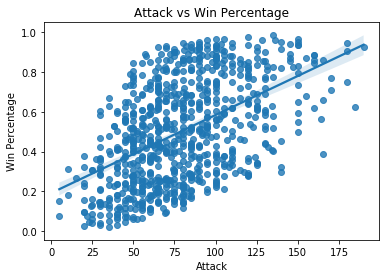

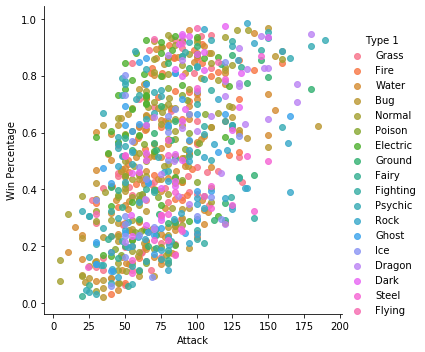

In [75]:
# Find features with the second greatest correlations (Attack, Win percentage)
sns.regplot(x = "Attack", y = "Win Percentage", data = results).set_title("Attack vs Win Percentage")
# Find features with the second greatest correlations (Attack, Win Percentage) for each hue (type 2).
sns.lmplot(x = 'Attack', y = 'Win Percentage', data = results, hue = 'Type 1', fit_reg = False)